In [9]:
import itertools
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import time

In [10]:
def create_data():
    
    #reds
    x1 = (139,0,0)
    x2 = (255,0,0)
    x3 = (220,20,60)
    x4 = (128,0,0)
    
    #blues
    x5 = (0,0,255)
    x6 = (0,0,139)
    x7 = (135,206,235)
    x8 = (0,191,255)
       
    #greens
    x9 = (0,255,0)
    x10 = (0,128,0)
    x11 = (107,142,35)
    x12 = (46,139,87) 
    
    #pinks
    x13 = (255,192,203)
    x14 = (255,182,193)
    x15 = (219,124,135)
    x16 = (239,176,183)
      
    #teals
    x17 = (0,128,128)
    x18 = (102,178,178)
    x19 = (110,177,162)
    x20 = (142,194,182)
    
    #yellow
    x21 = (255,215,0)
    x22 = (255,255,0)
    x23 = (255,241,102)
    x24 = (255,237,59)
    
    data = (x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24)
    
    data = np.asarray(data)/255
    
    np.random.shuffle(data)
    
    return data

   
# initialize all weights to random values between 0 and 1
def init_weights():
    weights = np.random.rand(100,100,3)
    return weights


# create a nxn matrix to store all performance index values
def winning_neuron_matrix(weights, data):
    
    I_matrix = np.sum(np.power(data-weights,2),axis=2)

    return I_matrix

# return the winning neuron
def get_winning_neuron(I_matrix):
    
    index = np.unravel_index(I_matrix.argmin(), I_matrix.shape)
    return index
    
    
# create distance matrix, each index stores the distance from winning matrix
def get_distance_matrix(index_dist, I_matrix, min_index):
    
#   dist_matrix = np.empty((I_matrix.shape[0],I_matrix.shape[1]),dtype=float)
    
    dist_sub = index_dist - np.asarray(min_index)    
    dist_matrix = np.sqrt(np.sum(np.power(dist_sub,2),axis=2))
    
    
#     dist_matrix = np.sqrt(np.sum((np.asarray(min_index)-(index_dist))**2))
    
#     print (np.indices(dist_matrix.shape))
    
#     dist_matrix = np.linalg.norm(np.asarray(min_index),index_dist)

#     print (dist_matrix)
    
#     for i in range(dist_matrix.shape[0]):
#         for j in range(dist_matrix.shape[1]):
#             other_index = np.asarray((i,j))
#             dist_matrix[i][j] = np.linalg.norm(np.asarray(min_index)-other_index)
            
    return dist_matrix


def get_neighborhood_matrix(dist_matrix, curr_epoch, total_epoch, sigma):
    
    sigma_k = sigma*np.exp(-curr_epoch/total_epoch)
    return np.exp(-np.power(dist_matrix,2)/(2*np.power(sigma_k,2)))


def update_weights(data, weights, alpha, nbh_matrix, curr_epoch, total_epoch):
    
    learning_rate = alpha*np.exp(-curr_epoch/total_epoch)
    
    weights = weights + learning_rate*nbh_matrix.reshape(100,100,1)*(data-weights)
    
#     print ("weights size - ", weights.shape)
#     print ("nbh weights - ", nbh_matrix.shape)
#     print ("data - ", data.shape)
    
#     for i in range(weights.shape[0]):
#         for j in range(weights.shape[1]):
#             w = weights[i][j]
#             weights[i][j] = w + learning_rate*nbh_matrix[i][j]*(data-w)

    return weights
    

In [11]:
def train_network(sigma):
    
    # create data and init weights
    data = create_data()
    weights = init_weights()
    
    init_weight = weights
    
    x = [i for i in range(0,100)]
    y = [i for i in range(0,100)]

    index_dist = np.asarray(list(itertools.product(x, y)))
    index_dist = index_dist.reshape(100,100,2)

    T = 1000
    alpha = 0.8
    
    save_weights = []
    fig, axs = plt.subplots(2,3, figsize = (15,10))

    for k in range(T):
        
        for i in range(24):

            I_matrix = winning_neuron_matrix(weights, data[i])

            winning_neuron_index = get_winning_neuron(I_matrix)

            dist_matrix = get_distance_matrix(index_dist, I_matrix, winning_neuron_index)

            nbh_matrix = get_neighborhood_matrix(dist_matrix,k,T,sigma)

            weights = update_weights(data[i], weights, alpha, nbh_matrix, k, T)
        
        if (k==19 or k==39 or k==99 or k==999):
            save_weights.append(weights)
        
    title = "SOM Map with Random Weights"
    axs[0, 0].set_title(title)
    axs[0, 0].imshow(init_weight)

    title = "Sigma " + str(sigma) + " at Epoch " + str(20)
    axs[0, 1].set_title(title)
    axs[0, 1].imshow(save_weights[0])

    title = "Sigma " + str(sigma) + " at Epoch " + str(40)
    axs[0, 2].set_title(title)
    axs[0, 2].imshow(save_weights[1])

    title = "Sigma " + str(sigma) + " at Epoch " + str(100)
    axs[1, 0].set_title(title)
    axs[1, 0].imshow(save_weights[2])

    title = "Sigma " + str(sigma) + " at Epoch " + str(1000)
    axs[1, 1].set_title(title)
    axs[1, 1].imshow(save_weights[3])
    
    fig.delaxes(axs[1,2])
    
    fig.tight_layout (pad = 3)

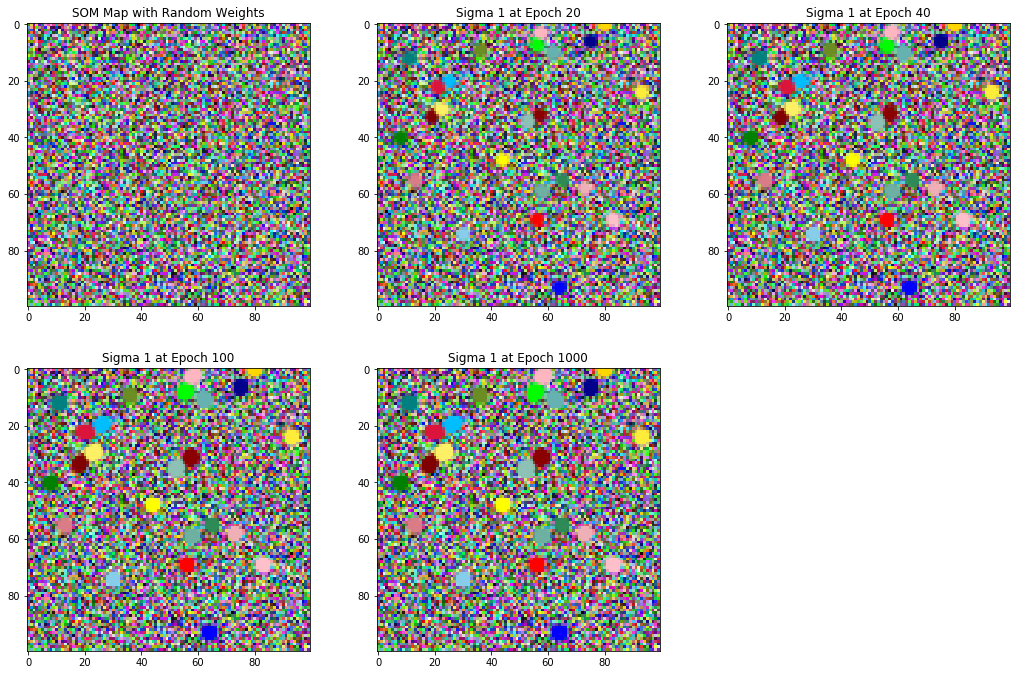

In [13]:
train_network(1)

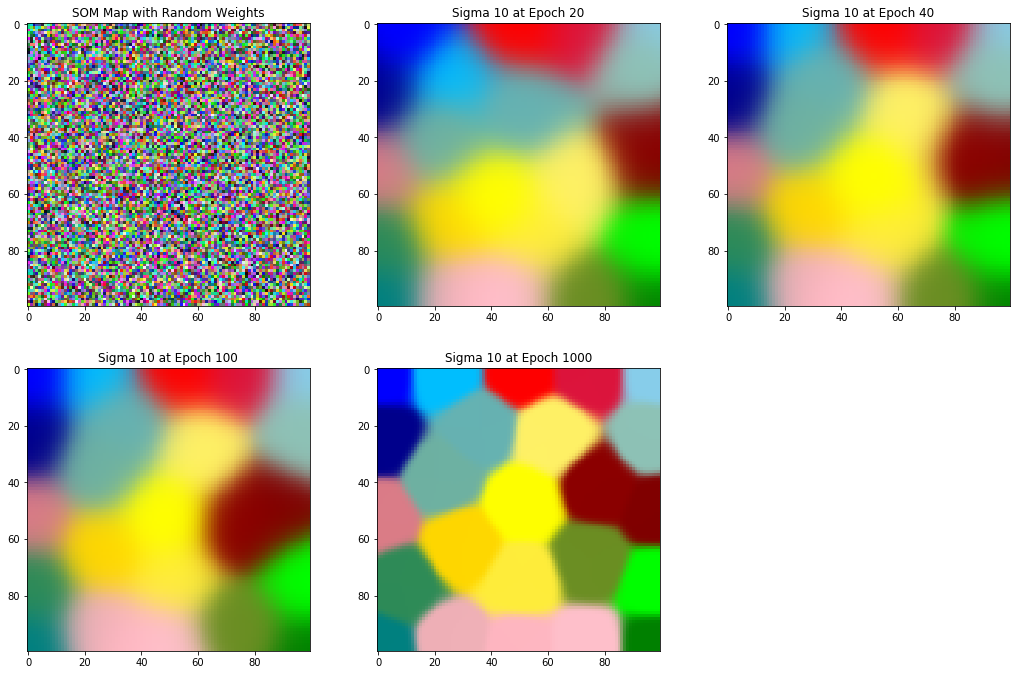

In [14]:
train_network(10)

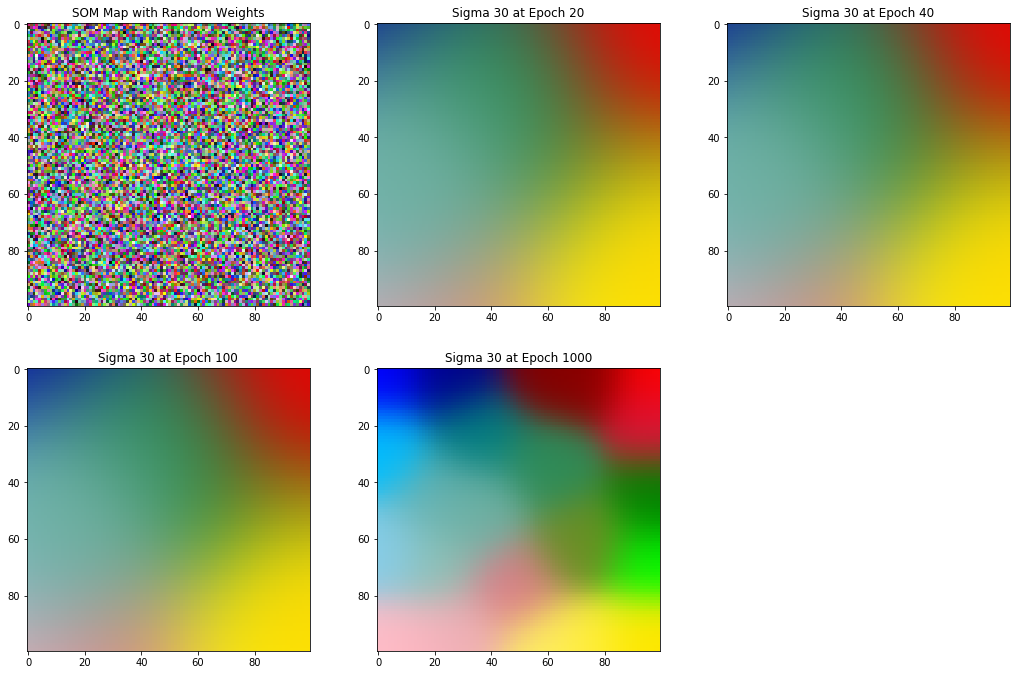

In [15]:
train_network(30)

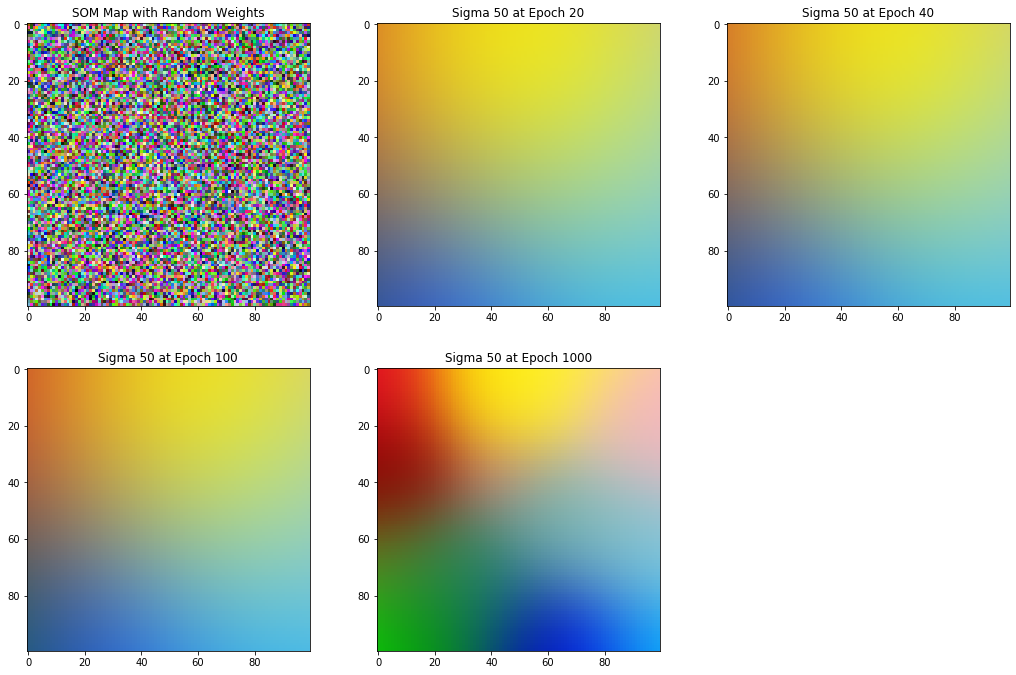

In [16]:
train_network(50)

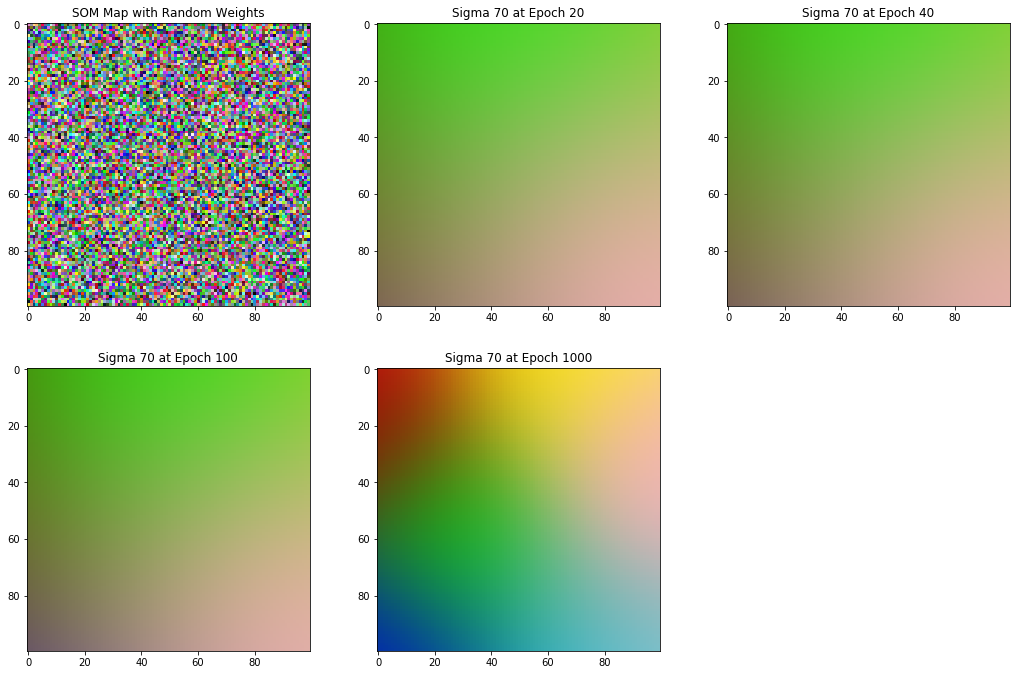

In [17]:
train_network(70)